## Importing all required Library

In [20]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split




##Loading Pretrainded CNN Model

In [21]:
re_model = keras.models.load_model("pretrained_augmented.h5")

## Load Preprocessed data

In [22]:
Features = pd.read_pickle("aer_features_augmented.pkl")

## Prepare for testing

In [28]:

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.95, random_state=0, shuffle=True)
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((90, 162, 1), (90, 5), (1722, 162, 1), (1722, 5))

## Predict with pretrained Model

In [29]:
# predicting on test data.
pred_test = re_model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

54/54 [==============================] - 1s 27ms/step


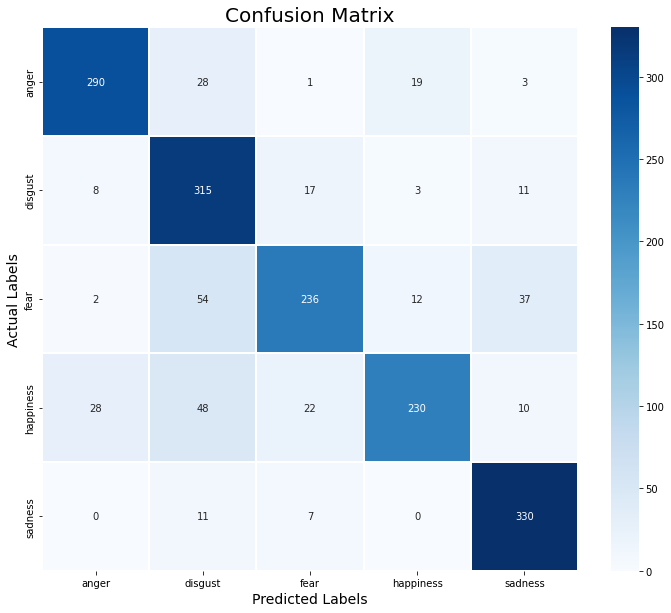

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.88      0.92      0.90       262
     disgust       0.83      0.87      0.85       255
        fear       0.85      0.81      0.83       245
   happiness       0.86      0.82      0.84       251
     sadness       0.95      0.93      0.94       256

    accuracy                           0.87      1269
   macro avg       0.87      0.87      0.87      1269
weighted avg       0.87      0.87      0.87      1269

